# Sentiment Analyis of Philippines Coronavirus Vaccination  Program

### Import Libraries

In [1]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

import datetime
import pytz
my_date = datetime.datetime.now(pytz.timezone('Asia/Manila'))
print(my_date.strftime("%Y-%m-%d"))
##Spacy

2021-08-05


### Standard Libraries

In [2]:
from textblob import TextBlob
import sys
import tweepy as twp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import seaborn as sns
import string
import advertools as adv
import re
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
#sklearn implementation of the Naive Bayes algorithm
from sklearn.naive_bayes import GaussianNB, MultinomialNB

#Standard Scaler
from sklearn.preprocessing import StandardScaler

#Train Test Split
from sklearn.model_selection import train_test_split

#Classification Metrics
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/martinlizardo/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/martinlizardo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Data Retrival in Twitter

In [56]:

consumerKey = "iG9j3Sy3SESvTUSOaNT9fSCMy"
consumerSecret = "Q4R0awmynUL2EuFihPqEgrfjAwUV1BHLbmXWRl8oeTIrANMtZm"
auth = twp.OAuthHandler(consumerKey, consumerSecret)
api = twp.API(auth)
noOfTweet = 1000
def percentage(part,whole):
 return 100 * float(part)/float(whole)

tweetsToSearch = ["#covidvaccineph -filter:retweets","#covid19vaccineph -filter:retweets","#resbakuna -filter:retweets","#BIDABakunation -filter:retweets","#BIDASolusyon -filter:retweets","#WeHealAsOnePH -filter:retweets","#covaxPH -filter:retweets"]
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for keyword in tweetsToSearch:
    tweets = twp.Cursor(api.search, q=keyword).items(noOfTweet)
    for tweet in tweets:
        tweet_list.append(tweet.text)
        analysis = TextBlob(tweet.text)
        score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
        neg = score["neg"]
        neu = score["neu"]
        pos = score["pos"]
        comp = score["compound"]
        polarity += analysis.sentiment.polarity

        if neg > pos:
            negative_list.append(tweet.text)
            negative += 1
        elif pos > neg:
            positive_list.append(tweet.text)
            positive += 1

        elif pos == neg:
            neutral_list.append(tweet.text)
            neutral += 1



positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, ".1f")
negative = format(negative, ".1f")
neutral = format(neutral,".1f")


tweet_list = pd.DataFrame(tweet_list)

print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  840
positive number:  131
negative number:  66
neutral number:  643


In [135]:
date_today=my_date.strftime("%Y-%m-%d")
print(date_today)
tweet_list.to_excel("covid_vaccine_" + date_today + "_sentiments.xlsx")

2021-08-03


### Combine Data that we accumalated from July 26 - Aug 1 2021

In [3]:
#List all data that we accumlated
df_july26 = pd.read_excel('../data/covid_vaccine_2021-07-26_sentiments.xlsx', engine='openpyxl')
df_july27 = pd.read_excel('../data/covid_vaccine_2021-07-27_sentiments.xlsx', engine='openpyxl')
df_july28 = pd.read_excel('../data/covid_vaccine_2021-07-28_sentiments.xlsx', engine='openpyxl')
df_july29 = pd.read_excel('../data/covid_vaccine_2021-07-29_sentiments.xlsx', engine='openpyxl')
df_july30 = pd.read_excel('../data/covid_vaccine_2021-07-30_sentiments.xlsx', engine='openpyxl')
df_july31 = pd.read_excel('../data/covid_vaccine_2021-07-31_sentiments.xlsx', engine='openpyxl')
df_aug01 = pd.read_excel('../data/covid_vaccine_2021-08-01_sentiments.xlsx', engine='openpyxl')


# combine all of them to one data frame
df_combined_sentiments = pd.concat([df_july26, df_july27, df_july28, df_july29, df_july30, df_july31, df_aug01])
#df_combined_sentiments = pd.read_excel('../data/covid_vaccine_2021-08-03_sentiments.xlsx', engine='openpyxl')

### Describe main data frame

In [4]:
df_combined_sentiments.shape

(13274, 2)

In [72]:
df_combined_sentiments.dtypes

Unnamed: 0     int64
0             object
dtype: object

In [73]:
df_combined_sentiments.columns

Index(['Unnamed: 0', 0], dtype='object')

In [74]:
df_combined_sentiments.describe()

,Unnamed: 0
count,13274.000000
mean,984.427151
std,612.650027
min,0.000000
25%,474.000000
50%,948.000000
75%,1422.000000
max,2579.000000


In [75]:
df_combined_sentiments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13274 entries, 0 to 1451
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  13274 non-null  int64 
 1   0           13274 non-null  object
dtypes: int64(1), object(1)
memory usage: 311.1+ KB


In [76]:
df_combined_sentiments.isnull()

,Unnamed: 0,0
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1447,False,False
1448,False,False
1449,False,False
1450,False,False


In [5]:
df_combined_sentiments.drop_duplicates(inplace = True)
df_combined_sentiments.to_csv('../data/combined_sentiments.csv')
df_combined_sentiments.head(10)

,Unnamed: 0,0
0,0,Oxford COVID vaccine produces strong immune re...
1,1,"AstraZeneca, Pfizer vaccines effective against..."
2,2,RT @pinoygastro: ‼️REPOSTING THIS BECAUSE EVER...
3,3,TINGNAN: Dumating na sa Pilipinas ang eroplano...
4,4,RT @ABSCBNNews: LOOK: Pasig City's vaccine rep...
5,5,RT @DZMMTeleRadyo: Nabakunahan ka na ba laban ...
6,6,Nabakunahan ka na ba laban sa #COVID19? Marami...
7,7,#PublicHealth #COVID19Vaccines #Covid19Vaccine...
8,8,RT @ABSCBNNews: Have you gotten your COVID-19 ...
9,9,RT @ABSCBNNews: Have you gotten your COVID-19 ...


### Clean combined_sentiments Data frame

#### Assign to new Data frame and rename columns

In [7]:
df_main = pd.DataFrame(df_combined_sentiments)
df_main["text"] = df_main[0]
df_main.drop(['Unnamed: 0', 0],axis = 1, inplace = True)
df_main.head(10)

,text
0,Oxford COVID vaccine produces strong immune re...
1,"AstraZeneca, Pfizer vaccines effective against..."
2,RT @pinoygastro: ‼️REPOSTING THIS BECAUSE EVER...
3,TINGNAN: Dumating na sa Pilipinas ang eroplano...
4,RT @ABSCBNNews: LOOK: Pasig City's vaccine rep...
5,RT @DZMMTeleRadyo: Nabakunahan ka na ba laban ...
6,Nabakunahan ka na ba laban sa #COVID19? Marami...
7,#PublicHealth #COVID19Vaccines #Covid19Vaccine...
8,RT @ABSCBNNews: Have you gotten your COVID-19 ...
9,RT @ABSCBNNews: Have you gotten your COVID-19 ...


### Cleaning Data

In [9]:
#Removing RT, Punctuation convert tweets to lower case
remove_rt = lambda x: re.sub("RT @\w+: ","",x)
rt = lambda x: re.compile('\#').sub('', re.compile('RT @').sub('@', x, count=1).strip())
df_main["text"] = df_main.text.map(remove_rt).map(rt)
df_main["text"] = df_main.text.str.lower()


###clean tweets
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([RT])', ' ', str(tweet).lower()).split())
 
df_main['text'] = df_main['text'].apply(lambda x : clean_tweet(x))
df_main['text'] = df_main['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))


#Remove Duplicates
df_main.drop_duplicates(subset='text', inplace = True)


df_cleaned = pd.DataFrame(df_main)
df_cleaned.head(10)

,text
0,oxford covid vaccine produces strong immune re...
1,astrazeneca pfizer vaccines effective against ...
2,reposting this because everybody wants have re...
3,tingnan dumating pilipinas eroplanong lulan ka...
4,look pasig city vaccine report pasig mayor vic...
5,nabakunahan laban covid19 maraming restaurant ...
6,nabakunahan laban covid19 maraming restaurant ...
7,publichealth covid19vaccines covid19vaccinerep...
8,have gotten your covid vaccine already many re...
10,have gotten your covid vaccine already many re...


### Sentiment Analyse

In [10]:
df_cleaned[['polarity', 'subjectivity']] = df_cleaned['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in df_cleaned['text'].iteritems():
 score = SentimentIntensityAnalyzer().polarity_scores(row)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 if neg > pos:
     df_cleaned.loc[index, 'sentiment'] = "negative"
 elif pos > neg:
     df_cleaned.loc[index, 'sentiment'] = "positive"
 else:
     df_cleaned.loc[index, 'sentiment'] = "neutral"
     df_cleaned.loc[index, 'neg'] = neg
     df_cleaned.loc[index, 'neu'] = neu
     df_cleaned.loc[index, 'pos'] = pos
     df_cleaned.loc[index, 'compound'] = comp

df_cleaned_negative  = df_cleaned[df_cleaned["sentiment"]=="negative"]
df_cleaned_positive  = df_cleaned[df_cleaned["sentiment"]=="positive"]
df_cleaned_neutral  = df_cleaned[df_cleaned["sentiment"]=="neutral"]

df_cleaned.to_csv('../data/cleaned.csv')
        
        
df_cleaned.head(10)

,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,oxford covid vaccine produces strong immune re...,0.433333,0.733333,neutral,0.0,1.0,0.0,0.0
1,astrazeneca pfizer vaccines effective against ...,0.600000,0.800000,neutral,0.0,1.0,0.0,0.0
2,reposting this because everybody wants have re...,0.075000,0.250000,negative,0.0,1.0,0.0,0.0
3,tingnan dumating pilipinas eroplanong lulan ka...,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
4,look pasig city vaccine report pasig mayor vic...,0.500000,0.500000,neutral,0.0,1.0,0.0,0.0
5,nabakunahan laban covid19 maraming restaurant ...,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
6,nabakunahan laban covid19 maraming restaurant ...,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
7,publichealth covid19vaccines covid19vaccinerep...,0.000000,0.000000,negative,0.0,1.0,0.0,0.0
8,have gotten your covid vaccine already many re...,0.500000,0.500000,neutral,0.0,1.0,0.0,0.0
10,have gotten your covid vaccine already many re...,0.500000,0.500000,neutral,0.0,1.0,0.0,0.0


In [115]:
#Removing Punctuation
def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([RT])','', text)
    return text
df_cleaned['punct'] = df_cleaned['text'].apply(lambda x: remove_punct(x))

#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
df_cleaned['tokenized'] = df_cleaned['punct'].apply(lambda x: tokenization(x.lower()))

#Removing stopwords
#stopword = nltk.corpus.stopwords.words('english')
stopword =  adv.stopwords['tagalog'].union(adv.stopwords['english'])
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text    
df_cleaned['nonstop'] = df_cleaned['tokenized'].apply(lambda x: remove_stopwords(x))

#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
df_cleaned['stemmed'] = df_cleaned['nonstop'].apply(lambda x: stemming(x))

#Clean Text
# def clean_text(text):
#     text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
#     text_rc = re.sub('[0-9]+','', text_lc)
#     tokens = re.split('\W+', text_rc)    # tokenization
#     text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
#     return text

In [116]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(df_cleaned,'sentiment')

,Total,Percentage
neutral,687,74.03
positive,192,20.69
negative,49,5.28


Text(0.5, 1.0, 'Summary of Counts for Total tweets')

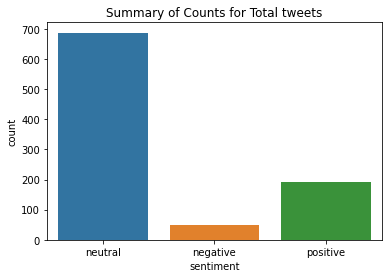

In [100]:
sns.countplot(df_cleaned["sentiment"])
plt.title("Summary of Counts for Total tweets")

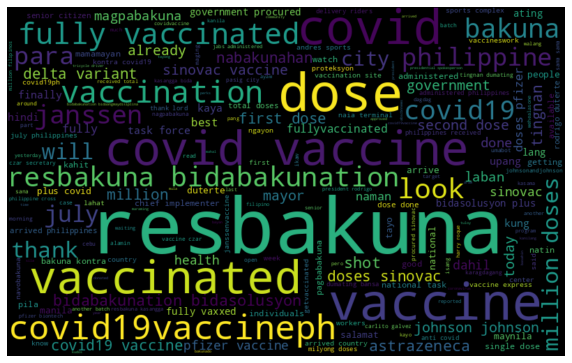

In [101]:
all_words = ' '.join([text for text in df_cleaned['text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

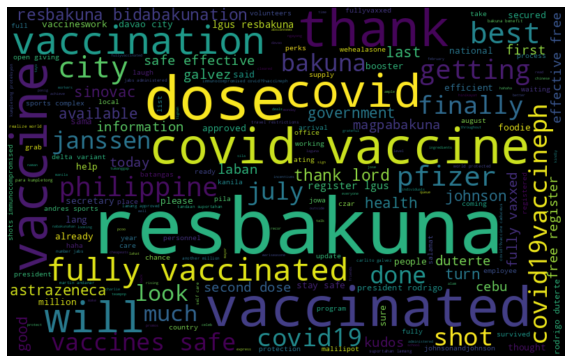

In [102]:
all_words = ' '.join([text for text in df_cleaned_positive['text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

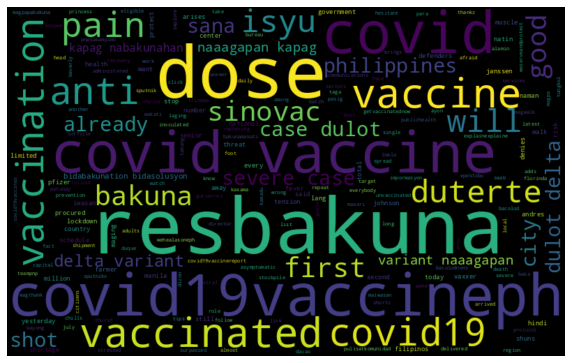

In [60]:
all_words = ' '.join([text for text in df_cleaned_negative['text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

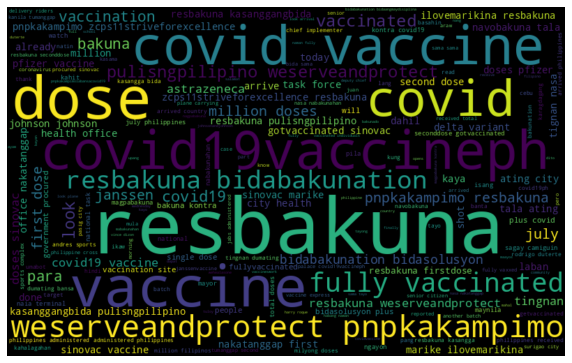

In [61]:
all_words = ' '.join([text for text in df_cleaned_neutral['text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [105]:
#Calculating tweet’s lenght and word count
df_cleaned['text_len'] = df_cleaned['text'].astype(str).apply(len)
df_cleaned['text_word_count'] = df_cleaned['text'].apply(lambda x: len(str(x).split()))

round(pd.DataFrame(df_cleaned.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,77.31
neutral,75.68
positive,78.64


In [106]:
round(pd.DataFrame(df_cleaned.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,10.41
neutral,9.36
positive,10.37


In [107]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(df_cleaned['text'])
print("{} Number of reviews has {} words".format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())
#1281 Number of reviews has 2966 words
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

928 Number of reviews has 2117 words


,,aabot,aalok,aaral,aasahang,abala,abbi,abl,abot,abroad,...,yung,zambal,zambosur,zcpsstriveforexcel,zeneca,zenica,zero,zerocovid,zombi,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
resbakuna,367
covid,274
dose,260
covidvaccineph,89
fulli,85
philippin,84
million,69
sinovac,68
bidabakun,65
bakuna,61


In [109]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
 vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
 bag_of_words = vec.transform(corpus)
 sum_words = bag_of_words.sum(axis=0) 
 words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
 words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
 return words_freq[:n]
#n2_bigram
n2_bigrams = get_top_n_gram(df_cleaned['text'],(2,2),20)
n2_bigrams

[('fully vaccinated', 55),
 ('covid vaccine', 53),
 ('resbakuna bidabakunation', 47),
 ('million doses', 32),
 ('covid vaccines', 32),
 ('bidabakunation bidasolusyon', 27),
 ('doses sinovac', 24),
 ('delta variant', 23),
 ('july 2021', 21),
 ('vaccine doses', 21),
 ('johnson johnson', 19),
 ('second dose', 19),
 ('covid19 vaccine', 18),
 ('vaccinated resbakuna', 18),
 ('doses covid', 17),
 ('doses pfizer', 16),
 ('task force', 14),
 ('government procured', 13),
 ('fully vaxxed', 13),
 ('bidasolusyon plus', 13)]

In [110]:
#n3_trigram
n3_trigrams = get_top_n_gram(df_cleaned['text'],(3,3),20)
n3_trigrams

[('resbakuna bidabakunation bidasolusyon', 24),
 ('covid vaccine doses', 14),
 ('million doses sinovac', 13),
 ('bidasolusyon plus covid', 12),
 ('national task force', 11),
 ('dose covid vaccine', 11),
 ('andres sports complex', 9),
 ('doses sinovac vaccine', 9),
 ('doses covid vaccines', 9),
 ('fully vaccinated resbakuna', 9),
 ('government procured sinovac', 8),
 ('president rodrigo duterte', 8),
 ('task force covid', 7),
 ('doses administered philippines', 7),
 ('resbakuna kasangga bida', 7),
 ('resbakuna bidasolusyon plus', 7),
 ('covid delta variant', 7),
 ('procured sinovac vaccines', 6),
 ('johnson johnson covid19', 6),
 ('johnson covid19 vaccine', 6)]

### Sentiments Classifications

<AxesSubplot:xlabel='sentiment', ylabel='count'>

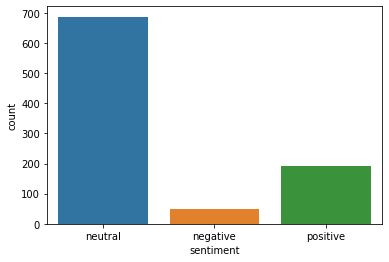

In [131]:
df_cleaned_model = pd.DataFrame(df_cleaned)
sns.countplot(data = df_cleaned, x = "sentiment")

### Split Dataset

In [183]:
#Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(countVector, df_cleaned_model['sentiment'], test_size=0.25, random_state=30)

neutral     687
positive    192
negative     49
Name: sentiment, dtype: int64

In [184]:
model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [216]:
predicted = model.predict(x_test)
accuracy_score = metrics.accuracy_score(predicted,y_test)
print(str('{:04.2f}'.format(accuracy_score * 100)) + '%')

73.28%


In [198]:
print (confusion_matrix(y_test, predicted))

[[  1   6   5]
 [  6 143  25]
 [  1  19  26]]


In [173]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

    negative       0.12      0.08      0.10        12
     neutral       0.85      0.82      0.84       174
    positive       0.46      0.57      0.51        46

    accuracy                           0.73       232
   macro avg       0.48      0.49      0.48       232
weighted avg       0.74      0.73      0.73       232

